# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [15]:
#importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
#lendo o dataset
df= pd.read_csv('/kaggle/input/dadosprojeto/demo01 (1).csv')

#Variaveis
df.columns

Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
       'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade',
       'tempo_emprego', 'possui_celular', 'possui_fone_comercial',
       'possui_fone', 'possui_email', 'qt_pessoas_residencia', 'mau'],
      dtype='object')

In [13]:
#tipo de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

In [12]:
#verificando dados faltantes
df.isna().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

In [14]:
#distribuiçao da variavel 'mau'

df['mau'].value_counts()

mau
False    16260
True       390
Name: count, dtype: int64

<Axes: xlabel='mau', ylabel='count'>

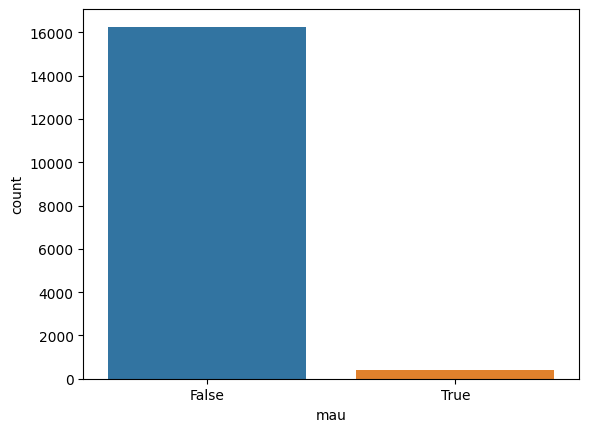

In [17]:
#distribuiçao em grafico

sns.countplot(data = df, x='mau')

#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável. 
    Dica: 
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis, 
        3. conte o número de categorias dessa variável 
        4. acumule essa informação de 3. na lista que você criou em 1. 
        5. No final, essa lista pode ser atribuída à nossa variável.
3. Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}.

In [19]:
#criando variaveis com o nome das colunas, tipos de dados

colunas = list(df.columns) #cria uma lista com as colunas
tipos = list(df.dtypes) #cria uma lista com os tipos de dados

# criando a variabel qtd_categorias

qtd_categorias = list(df.nunique(axis=0)) #cria uma lista com os valores unicos em cada linha

#criando o dataframe

df_var = pd.DataFrame({'VARIAVEIS':colunas,
                       'TIPOS DE DADOS':tipos,
                       'QTD_CATEGORIAS':qtd_categorias})

In [20]:
#exibe o df
df_var 

,VARIAVEIS,TIPOS DE DADOS,QTD_CATEGORIAS
0,sexo,object,2
1,posse_de_veiculo,object,2
2,posse_de_imovel,object,2
3,qtd_filhos,int64,8
4,tipo_renda,object,5
5,educacao,object,5
6,estado_civil,object,5
7,tipo_residencia,object,6
8,idade,float64,5298
9,tempo_emprego,float64,3005


#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [64]:
#criando dummies
df_dummy = pd.get_dummies(df, columns =['sexo','posse_de_veiculo','posse_de_imovel',
                                        'tipo_renda','educacao','estado_civil','tipo_residencia'],drop_first = True,dtype = int) 

# usei o parametro 'dtype = int' pra converter todos os True e False para 0 e 1

In [65]:
#exibe o df
df_dummy.head(5)

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,1,...,1,1,0,0,0,1,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,False,0,...,1,0,0,1,0,1,0,0,0,0
2,0,52.356164,8.358904,1,0,1,1,1.0,False,0,...,1,0,0,1,0,1,0,0,0,0
3,0,46.224658,2.106849,1,1,1,1,2.0,False,1,...,0,1,0,0,0,1,0,0,0,0
4,0,29.230137,3.021918,1,0,0,0,2.0,False,0,...,0,1,0,0,0,1,0,0,0,0


In [66]:
#verificando novamente o tipo de dados
df_dummy.dtypes

qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                          bool
sexo_M                                      int64
posse_de_veiculo_Y                          int64
posse_de_imovel_Y                           int64
tipo_renda_Pensioner                        int64
tipo_renda_State servant                    int64
tipo_renda_Student                          int64
tipo_renda_Working                          int64
educacao_Higher education                   int64
educacao_Incomplete higher                  int64
educacao_Lower secondary                    int64
educacao_Secondary / secondary special      int64


#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [67]:
#crosstab entre as quantidadades'possui_email' e 'mau'
tab_cruz_email = pd.crosstab(df_dummy['possui_email'],df['mau'])
tab_cruz_email

mau,False,True
possui_email,,
0,14810,360
1,1450,30


In [71]:
#crosstab entre as proporçoes'possui_email' e 'mau'
tab_cruz_email_pr = tab_cruz_email.div(tab_cruz_email.sum(axis =1), axis = 0)
tab_cruz_email_pr

mau,False,True
possui_email,,
0,0.976269,0.023731
1,0.979730,0.020270


Em relação a variavel 'possui_email' é possivel concluir que a proporçao de pessoas que possuem ou nao email é de 2% de se tornarem maus pagadores.

In [72]:
#crosstab entre as quantidadades'posse_de_veiculo_Y' e 'mau'
tab_cruz_veiculo = pd.crosstab(df_dummy['posse_de_veiculo_Y'],df['mau'])
tab_cruz_veiculo

mau,False,True
posse_de_veiculo_Y,,
0,9931,247
1,6329,143


In [73]:
#crosstab entre as proporçoes'posse_de_veiculo_Y' e 'mau'
tab_cruz_veiculo_pr = tab_cruz_veiculo.div(tab_cruz_veiculo.sum(axis =1), axis = 0)
tab_cruz_veiculo_pr

mau,False,True
posse_de_veiculo_Y,,
0,0.975732,0.024268
1,0.977905,0.022095


Assim como no caso anterior a proporçao de pessoas que tem veiculos ou não tem aproximadamente 2% de chance de se tornarem maus pagadores.Então tanto a variavel de posse de veiculo ou posse de email não sao fatores determinantes para uma pessoa se tornar mau pagador.

#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [79]:
df_dummy.to_csv('demo01_limpa.csv')